# Dataset Overview

This dataset represents boston marathon results from 2014. Contains approximately 32000 observations across 21 columns.

In [535]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.decomposition import PCA
from sklearn import metrics
import re

%matplotlib inline

# Read Data In

In [536]:
boston = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [537]:
boston.shape

(31984, 21)

In [538]:
boston.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [539]:
list(boston.columns)

['10k',
 'name',
 'division',
 '25k',
 'gender',
 'age',
 'official',
 'bib',
 'genderdiv',
 'ctz',
 '35k',
 'overall',
 'pace',
 'state',
 '30k',
 '5k',
 'half',
 '20k',
 'country',
 'city',
 '40k']

In [540]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [541]:
boston.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


# Exploratory Analysis

In [542]:
# # First remove '-' from all columns

def non_decimal(x):
    x = str(x)
    if x.find('-') != -1:
        return np.nan
    else:
        return float(x)

boston['5k'] = boston['5k'].apply(non_decimal)    
boston['10k'] = boston['10k'].apply(non_decimal)
boston['20k'] = boston['20k'].apply(non_decimal)
boston['25k'] = boston['25k'].apply(non_decimal)
boston['half'] = boston['half'].apply(non_decimal)
boston['30k'] = boston['30k'].apply(non_decimal)
boston['35k'] = boston['35k'].apply(non_decimal)
boston['40k'] = boston['40k'].apply(non_decimal)
boston['official'] = boston['official'].apply(non_decimal)

display(boston.head(5))

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


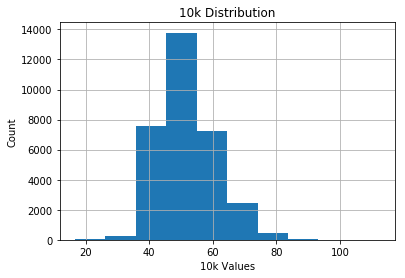

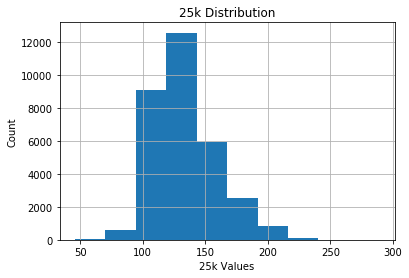

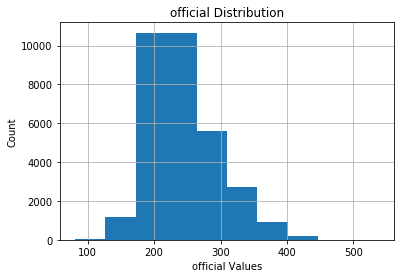

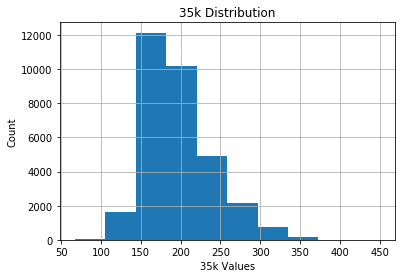

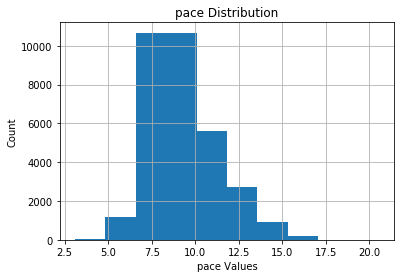

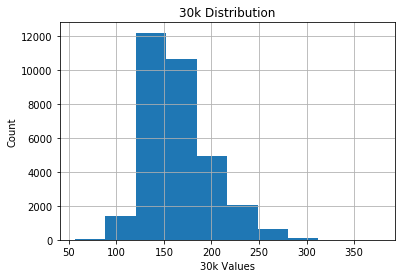

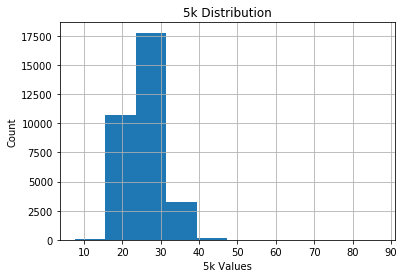

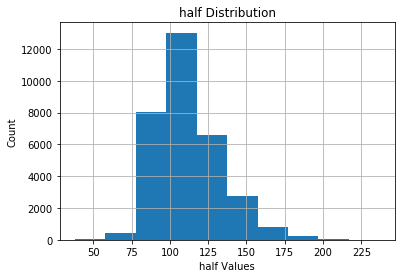

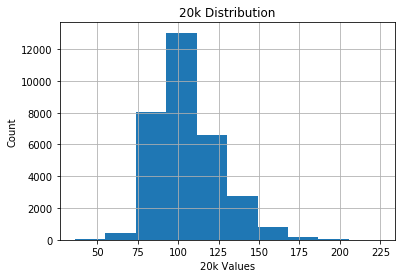

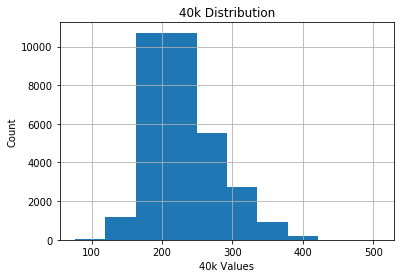

In [543]:
# Plot histograms for all continuous data
for col in boston.dtypes[boston.dtypes == 'float64'].index:
    boston[col].hist()
    plt.title(col + " Distribution")
    plt.xlabel(col + " Values")
    plt.ylabel("Count")
    plt.show()

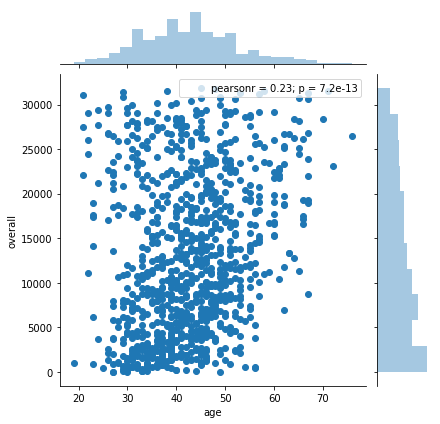

In [544]:
#Age vs. Overall

sns.jointplot(x="age", y="overall", data=boston.dropna())
plt.show()

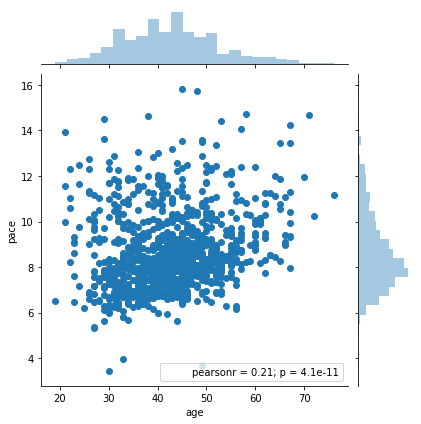

In [545]:
#Age/Gender vs. Pace

sns.jointplot(x="age", y="pace", data=boston.dropna())
plt.show()

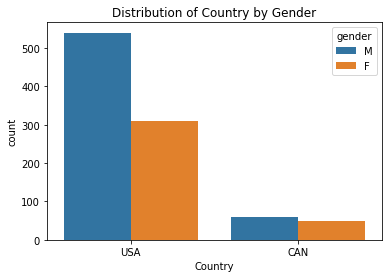

In [546]:
#Countplot of country with gender

sns.countplot(x='country', hue='gender', data=boston.dropna())
plt.title('Distribution of Country by Gender')
plt.xlabel('Country')
plt.show()

# Data Cleaning

In [547]:
#Determine missing values across dataframe

missing_values_count = boston.isnull().sum()
print(missing_values_count)

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64


In [548]:
categorical = boston.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

name
31915
gender
2
bib
31984
ctz
84
state
68
country
78
city
5934


In [549]:
#Remove columns with many unique values, for perfomance purposes - name, bib, ctz, city
#Drop features

boston = boston.drop(['name'], 1)
boston = boston.drop(['bib'], 1)
boston = boston.drop(['ctz'], 1)
boston = boston.drop(['city'], 1)

In [550]:
#Drop null values
boston = boston.dropna()

In [551]:
#Confirm no missing values
missing_values_count = boston.isnull().sum()
print(missing_values_count)

10k          0
division     0
25k          0
gender       0
age          0
official     0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
40k          0
dtype: int64


# Use K Means to Estimate Clusters

In [556]:
#Establish X

X_categorical = boston.loc[:, boston.columns.isin(['gender', 'state', 'country'])]
X_categorical = pd.get_dummies(X_categorical)
print(X_categorical.shape)

X_continuous = boston.loc[:, ~(boston.columns).isin(['gender', 'state', 'country'])]
saved_cols = X_continuous.columns
X_continous_norm = normalize(X_continuous)
X_continuous = pd.DataFrame(X_continous_norm)
X_continuous.columns = saved_cols
print(X_continuous.shape)

X = pd.concat([X_continuous, X_categorical], axis=1)
print(X.shape)

(29103, 72)
(29103, 14)
(31237, 86)


In [505]:
#Establish Training/Test Sets - Random Sample of X for both variables (approx. 90% for Train and 10% for Test)

X_train = X.sample(n=24000)
X_test = X.sample(n=2700)

In [506]:
X_train.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_YT,country_CAN,country_USA
18163,0.002707,0.007107,0.006856,0.002863,0.012311,0.358570,0.010084,0.933161,0.000470,0.008478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13902,0.003644,0.052033,0.008988,0.002953,0.015730,0.302919,0.012880,0.951086,0.000600,0.010893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27406,0.001917,0.076160,0.005041,0.001491,0.009683,0.492400,0.007767,0.866833,0.000370,0.006337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6658,0.005526,0.128204,0.013925,0.004856,0.024151,0.647211,0.019859,0.749920,0.000923,0.016869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3734,0.004967,0.057355,0.012427,0.005519,0.021911,0.640426,0.017728,0.764658,0.000837,0.015039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [507]:
# #Declare and fit the model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

#Extract cluster assignments for each data point and add as a column in DataFrame
X_train['labels'] = kmeans.labels_

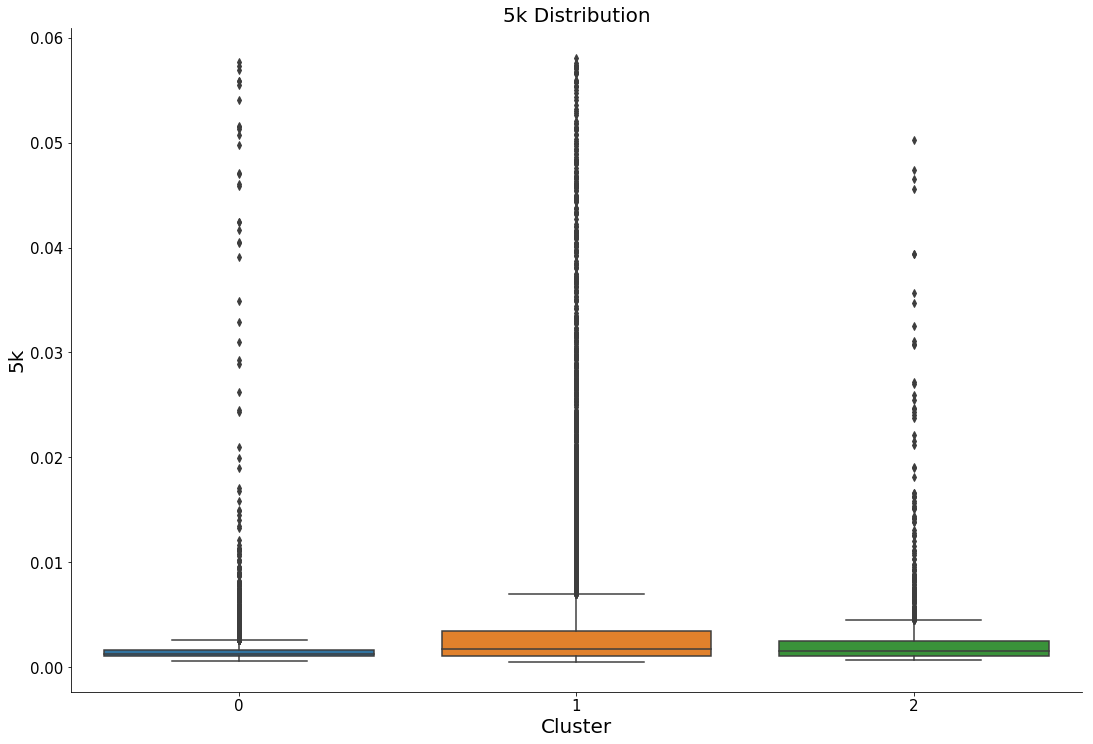

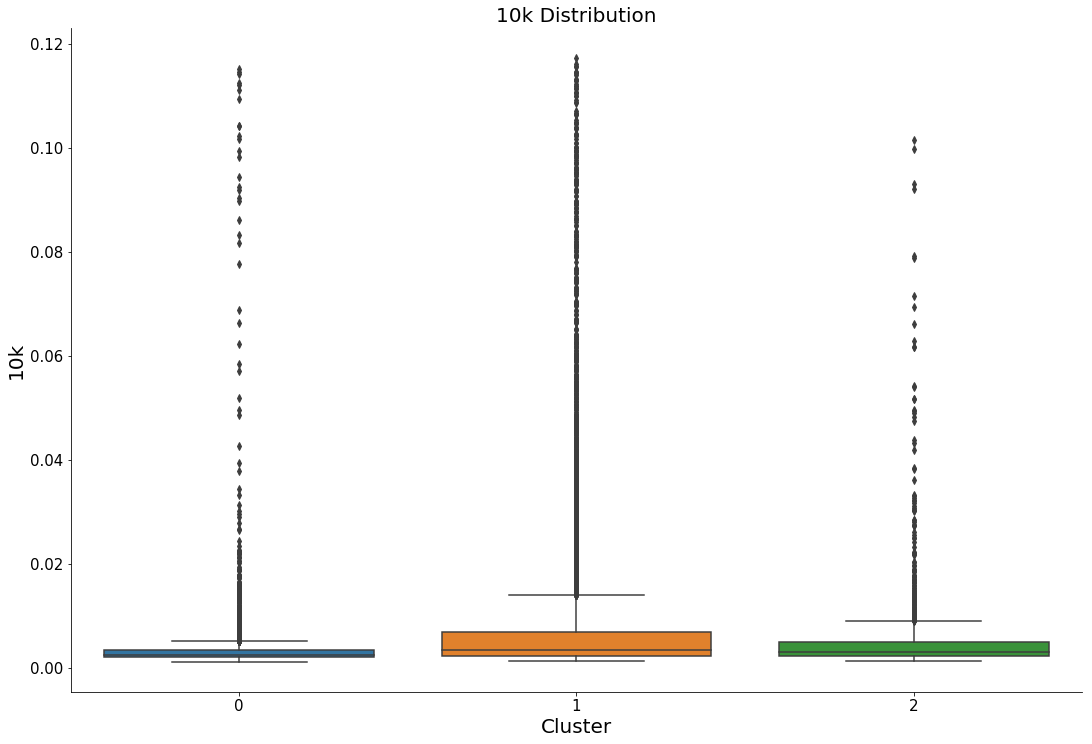

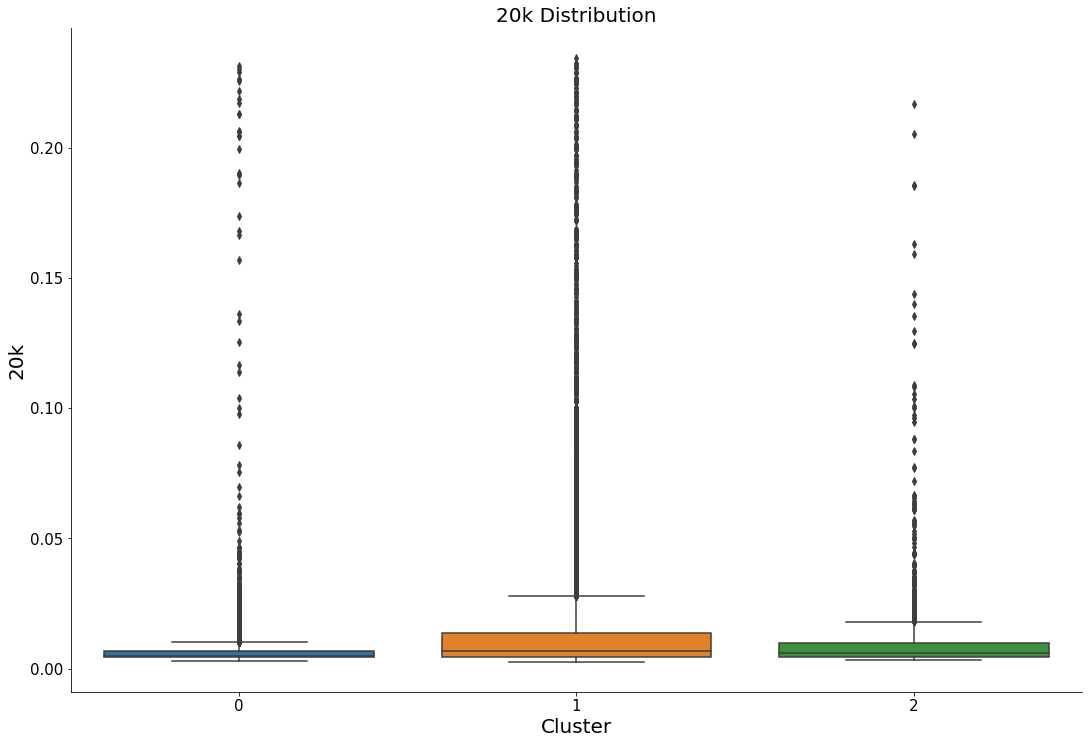

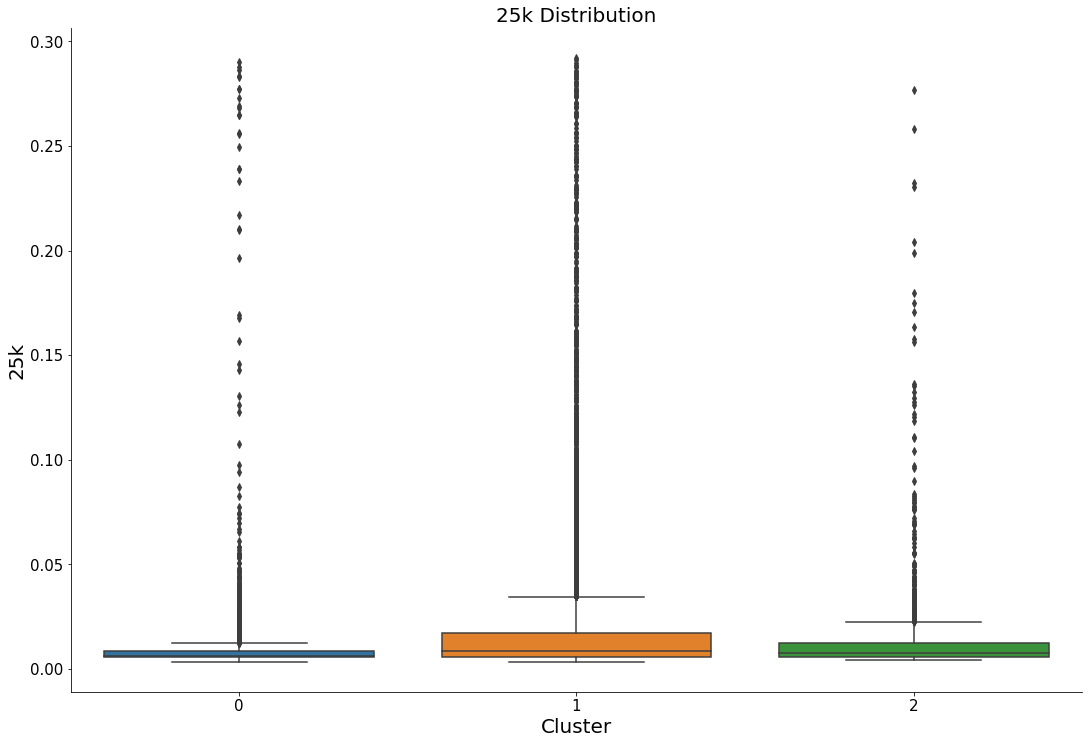

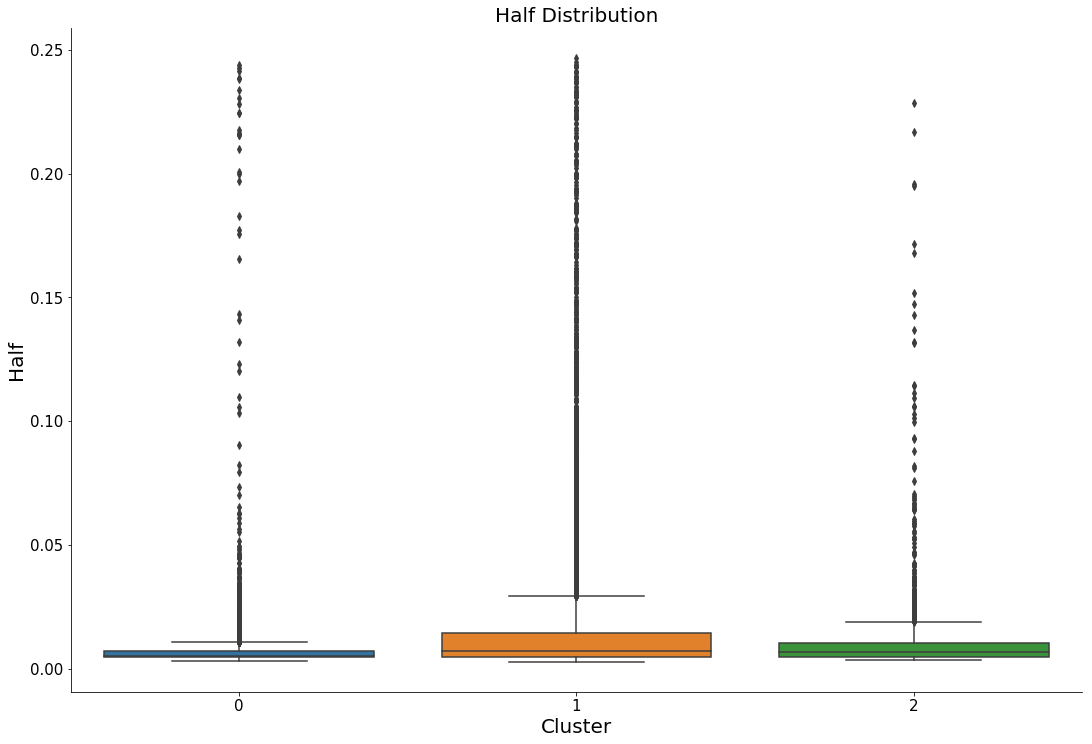

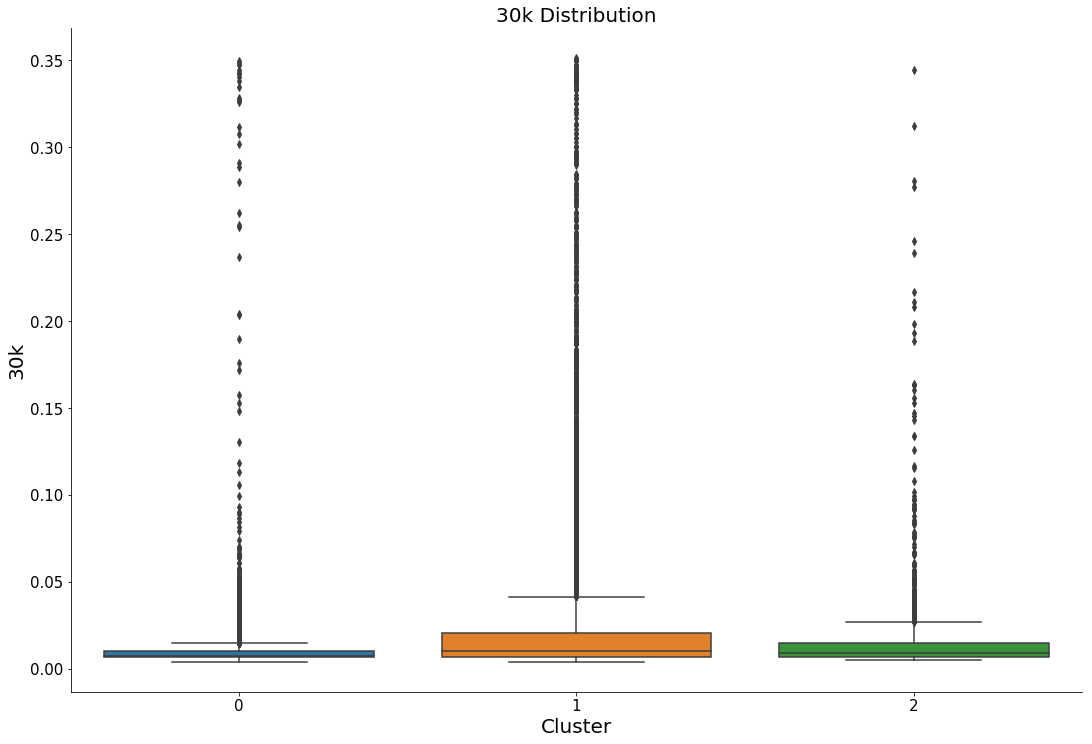

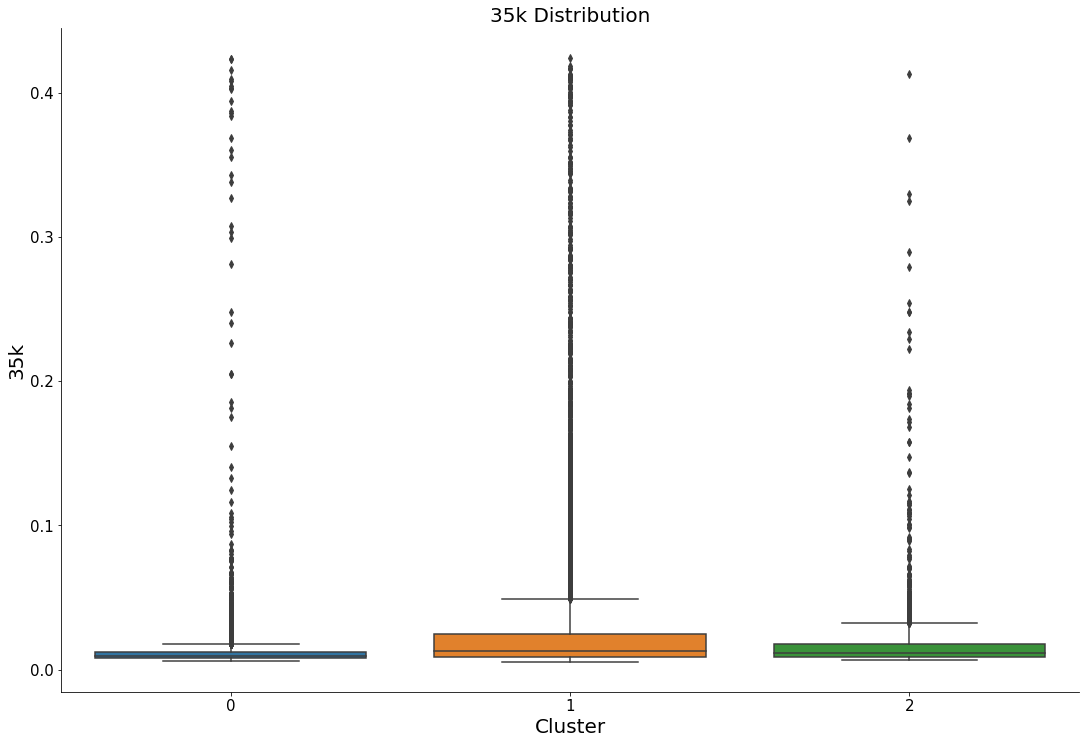

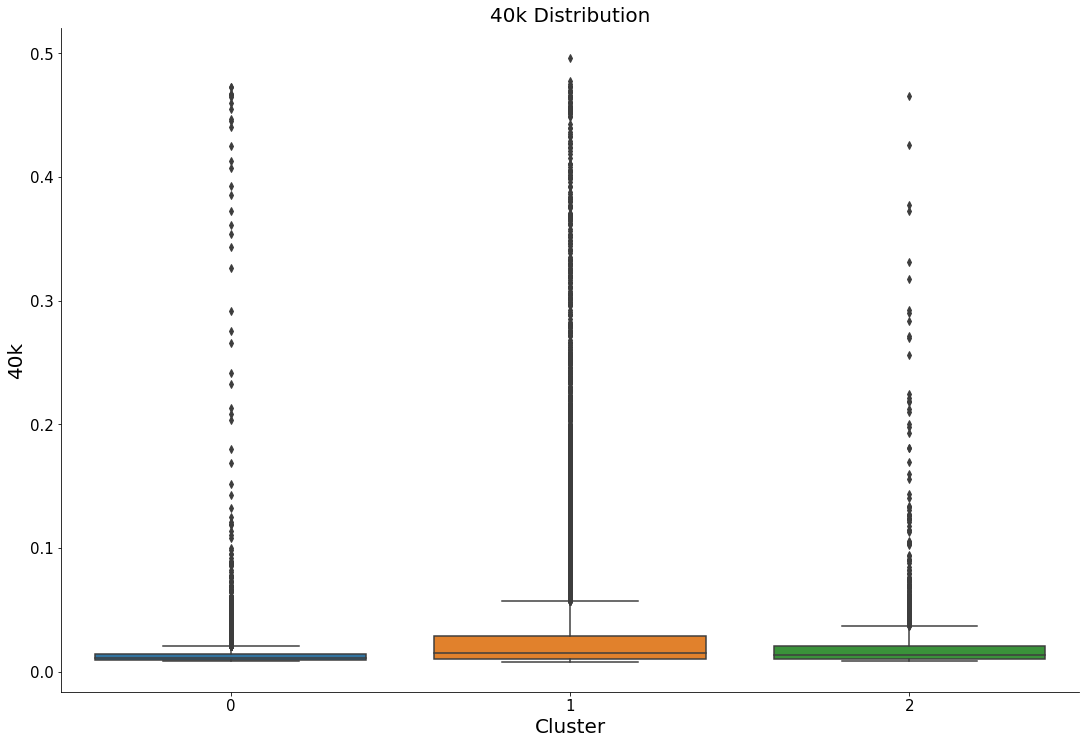

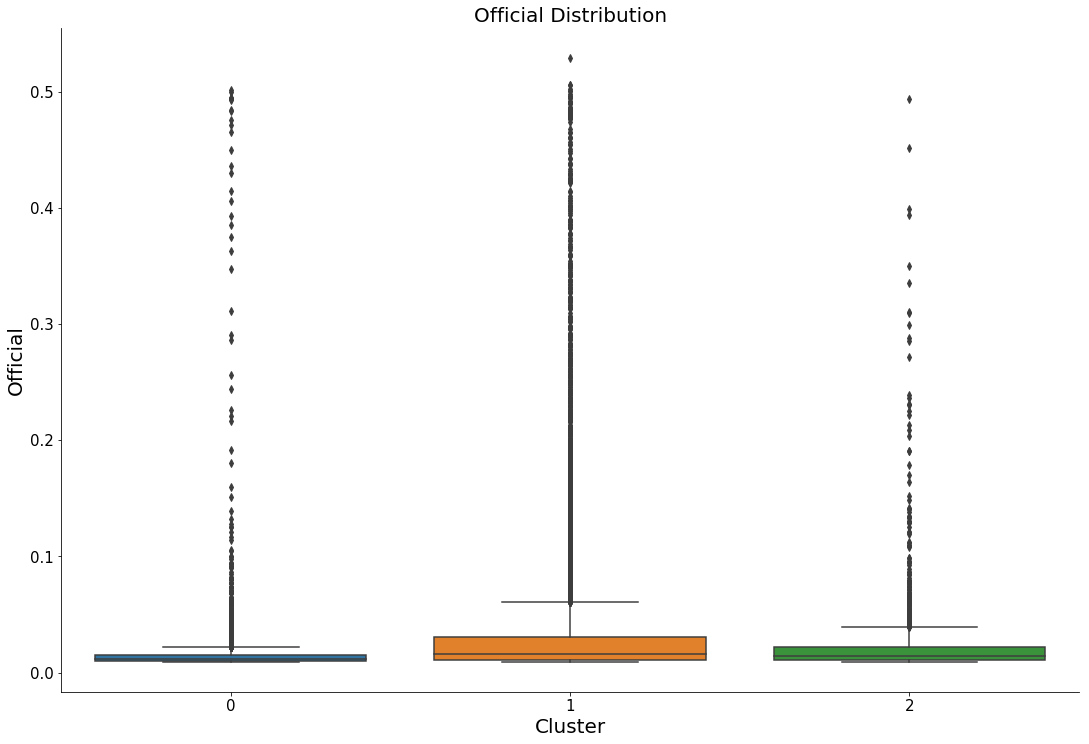

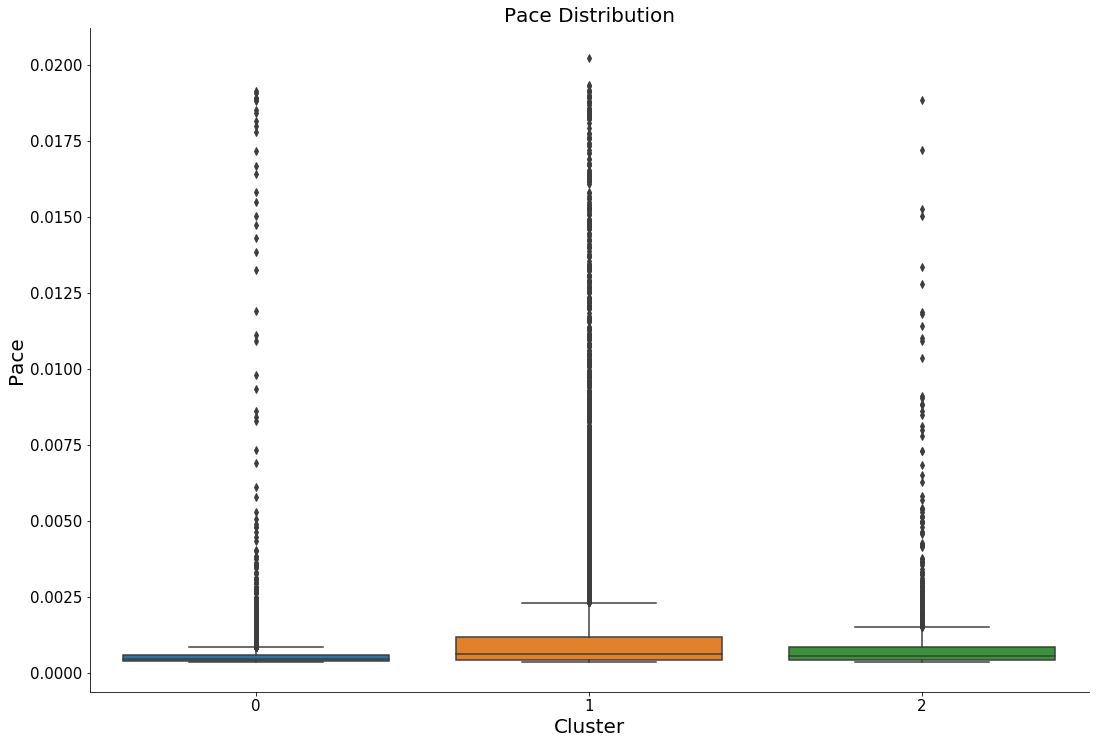

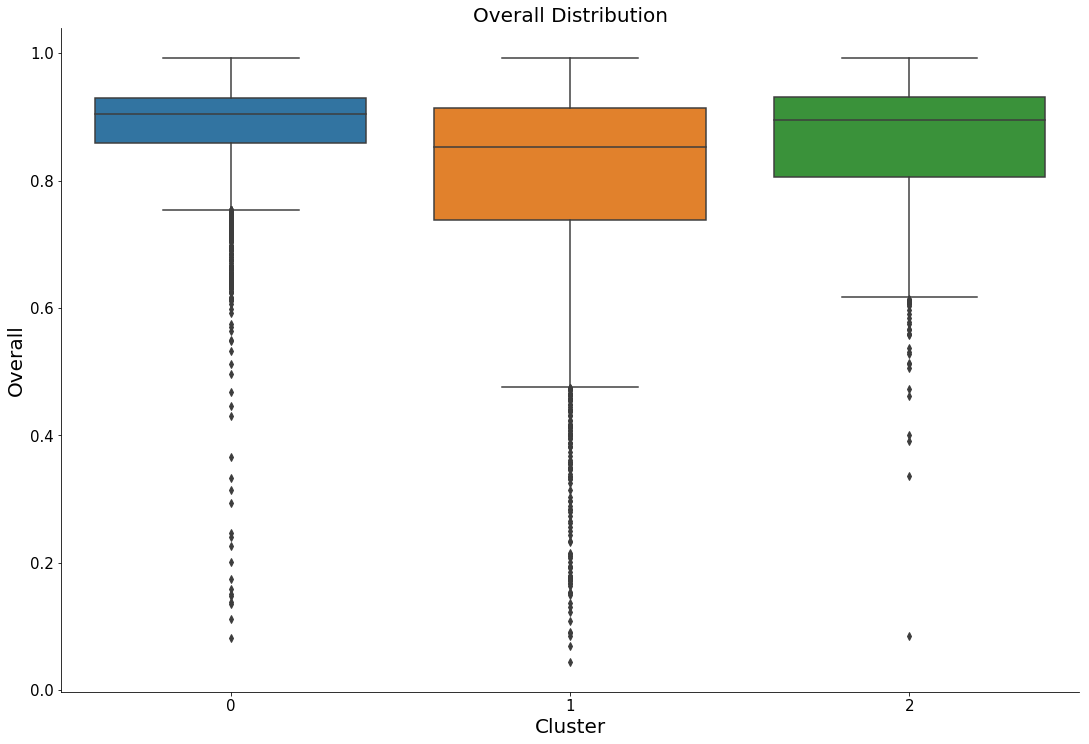

In [532]:
#Boxplots for each continuous feature and cluster

for col in X_train[['5k', '10k', '20k', '25k', 'half', '30k', '35k', '40k', 'official', 'pace', 'overall']]:
    sns.factorplot(kind='box', y=col, x='labels', data=X_train, size=10, aspect=1.5, legend_out=False)
    plt.xlabel('Cluster', fontsize=20)
    plt.ylabel(col.capitalize(), fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(col.capitalize() + ' Distribution', fontsize=20)
    plt.show()